In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  i

In [3]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1/255)
validation_image_generator = ImageDataGenerator(rescale = 1/255)
test_image_generator = ImageDataGenerator(rescale = 1/255)

train_data_gen = train_image_generator.flow_from_directory(directory= train_dir,target_size = ((IMG_HEIGHT,IMG_WIDTH)),class_mode = "binary",shuffle = True, batch_size= batch_size)
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir, target_size = ((IMG_HEIGHT,IMG_WIDTH)),class_mode = "binary", shuffle = True, batch_size = batch_size)
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,classes = ["."],target_size = ((IMG_HEIGHT,IMG_WIDTH)), shuffle =False,class_mode = None,  batch_size = batch_size )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


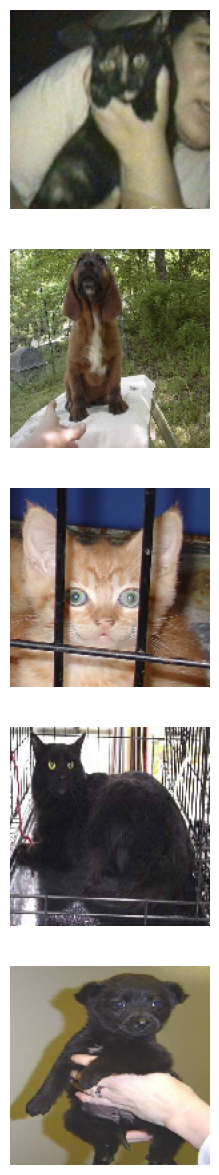

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [20]:
# 5
train_image_generator = ImageDataGenerator(rotation_range = 40, 
                                           width_shift_range=0.2, 
                                           height_shift_range=0.2, 
                                           shear_range = 0.2, 
                                           zoom_range = 0.2,
                                           brightness_range=(0.3, 1.2) ,
                                           horizontal_flip = True, 
                                           fill_mode = "nearest", 
                                           rescale = 1/255)


Found 2000 images belonging to 2 classes.


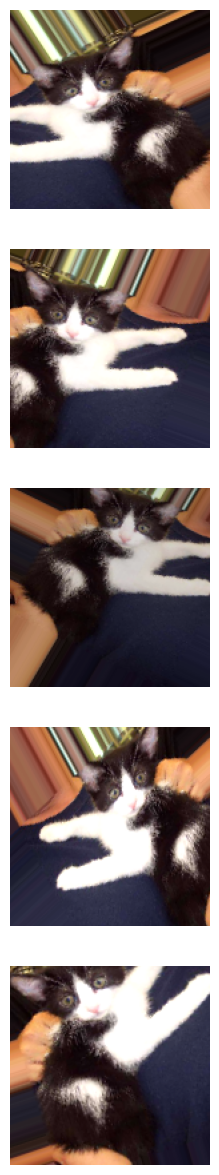

In [12]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [21]:
# 7
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 64)      

In [22]:
# 8


history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)




Epoch 1/15
16/16 [==============================] - 90s 5s/step - loss: 0.8238 - accuracy: 0.5065 - val_loss: 0.6904 - val_accuracy: 0.5010
Epoch 2/15
16/16 [==============================] - 84s 5s/step - loss: 0.6901 - accuracy: 0.5285 - val_loss: 0.6852 - val_accuracy: 0.5010
Epoch 3/15
16/16 [==============================] - 96s 6s/step - loss: 0.6802 - accuracy: 0.5665 - val_loss: 0.6589 - val_accuracy: 0.6210
Epoch 4/15
16/16 [==============================] - 95s 6s/step - loss: 0.6635 - accuracy: 0.5950 - val_loss: 0.6272 - val_accuracy: 0.6450
Epoch 5/15
16/16 [==============================] - 95s 6s/step - loss: 0.6565 - accuracy: 0.6030 - val_loss: 0.6445 - val_accuracy: 0.6290
Epoch 6/15
16/16 [==============================] - 96s 6s/step - loss: 0.6469 - accuracy: 0.6290 - val_loss: 0.6020 - val_accuracy: 0.6700
Epoch 7/15
16/16 [==============================] - 96s 6s/step - loss: 0.6267 - accuracy: 0.6475 - val_loss: 0.5934 - val_accuracy: 0.6710
Epoch 8/15
16/16 [==

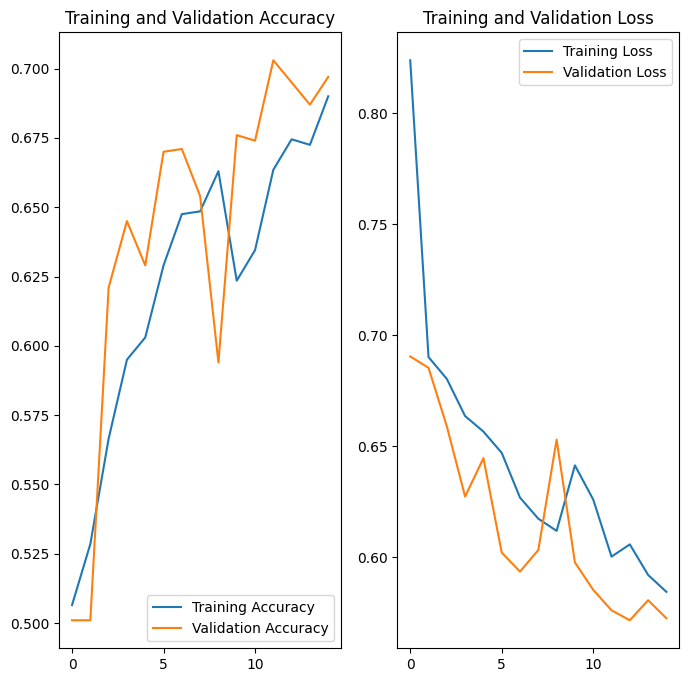

In [23]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
predictions =  model.predict(test_data_gen)
probabilities = [1 if a[0]<a[1] else 0 for a in predictions]

1/1 [==============================] - 1s 635ms/step


In [25]:
print(len(probabilities))

50


In [26]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
